## Experiment Setup

In [15]:
# Import Statements / Setup
from Dataset import Dataset
import matplotlib.pyplot as plt
import numpy as np
from preprocess_data import filter_genres
import sklearn
import time

from models.Model import Model
from models.LogisticRegression import LogisticRegression


%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def current_time_millis():
    return int(round(time.time() * 1000))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load / Preprocess Data

In [2]:
np.random.seed(123456789) # Make ordering of data consistent b/w runs

# List of all genres
ALL_GENRES_LIST = [
    'Action', 'Adventure', 'Animation', 'Comedy',
    'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
    'History', 'Horror', 'Music', 'Mystery', 'Romance',
    'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western'
]

# List of genres which we will attempt to classify.
USED_GENRES_LIST = [
    'Action', 'Comedy'
]

# Load and Shuffle Data.
start_time = current_time_millis()
posters, genres = np.load('movie_data/posters.npy'), np.load('movie_data/genres.npy')
posters, genres = sklearn.utils.shuffle(posters, genres)
end_time = current_time_millis()
print('Loading Data took {0} seconds'.format((end_time-start_time)/1000.0))

# Remove genres which we are not attempting to classify
genres = filter_genres(ALL_GENRES_LIST, USED_GENRES_LIST, genres)

Loading Data took 9.693 seconds


## Initializing Train / Validation / Test Datasets

In [3]:
# TRAIN/VALID/TEST SPLIT = 75/15/10
TRAIN_SPLIT = int(np.ceil(len(posters) * 0.75))
VALID_SPLIT = TRAIN_SPLIT + int(np.ceil(len(posters) * 0.15))

train_dataset = Dataset(posters[:TRAIN_SPLIT], genres[:TRAIN_SPLIT])
valid_dataset = Dataset(posters[TRAIN_SPLIT:VALID_SPLIT], genres[TRAIN_SPLIT:VALID_SPLIT])
test_dataset = Dataset(posters[VALID_SPLIT:], genres[VALID_SPLIT:])

print('Total Number of Examples: {0}'.format(len(posters)))
print('Number of Train/Valid/Test Examples: {0}/{1}/{2}'.format(
    train_dataset.size(),
    valid_dataset.size(),
    test_dataset.size()
))
print('Image Size: {0}'.format(posters.shape[1:]))
print('Number of Genres: {0}'.format(genres.shape[1]))

Total Number of Examples: 29588
Number of Train/Valid/Test Examples: 22191/4439/2958
Image Size: (278, 185, 3)
Number of Genres: 2


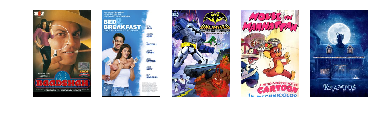

In [4]:
rows, columns = 1, 5
fig = plt.figure()
for i in range(1, rows*columns+1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(train_dataset.X[i-1])
    plt.axis('off')

## Baseline Model (Logistic Regression)

In [18]:
def flatten_dataset(dataset):
    return Dataset(
        np.reshape(dataset.X, (dataset.size(), -1)),
        dataset.y
    )

flat_train_dataset = flatten_dataset(train_dataset)
flat_valid_dataset = flatten_dataset(valid_dataset)

model = LogisticRegression(
    USED_GENRES_LIST,
    flat_train_dataset.X.shape[1],
    len(USED_GENRES_LIST)
)
model.train(
    flat_train_dataset,
    flat_valid_dataset,
    num_epochs = 10,
    verbose=True
)

Epoch #1 out of 10:  100% | loss:   16.7 | accuracy:  0.277 | ETA:  00:00:00   

Validation Loss: 16.2746 *
+--------+----------+-----------+--------+--------+
| Genre  | Accuracy | Precision | Recall |   F1   |
+--------+----------+-----------+--------+--------+
| Action |  0.1802  |   0.1746  | 0.9846 | 0.2965 |
| Comedy |  0.4062  |   0.3437  | 0.8658 | 0.4921 |
+--------+----------+-----------+--------+--------+


Epoch #2 out of 10:  100% | loss:   16.6 | accuracy:  0.283 | ETA:  00:00:00   

Validation Loss: 16.4450 
+--------+----------+-----------+--------+--------+
| Genre  | Accuracy | Precision | Recall |   F1   |
+--------+----------+-----------+--------+--------+
| Action |  0.1802  |   0.1746  | 0.9846 | 0.2965 |
| Comedy |  0.3913  |   0.3416  | 0.8969 | 0.4948 |
+--------+----------+-----------+--------+--------+


Epoch #3 out of 10:  100% | loss:   13.3 | accuracy:  0.424 | ETA:  00:00:00   

Validation Loss: 13.5566 *
+--------+----------+-----------+--------+--------+
| Genre  | Accuracy | Precision | Recall |   F1   |
+--------+----------+-----------+--------+--------+
| Action |  0.1802  |   0.1746  | 0.9846 | 0.2965 |
| Comedy |  0.6423  |   0.2042  | 0.0264 | 0.0468 |
+--------+----------+-----------+--------+--------+


Epoch #4 out of 10:  100% | loss:   13.1 | accuracy:  0.429 | ETA:  00:00:00   

Validation Loss: 13.2972 *
+--------+----------+-----------+--------+--------+
| Genre  | Accuracy | Precision | Recall |   F1   |
+--------+----------+-----------+--------+--------+
| Action |  0.1802  |   0.1746  | 0.9846 | 0.2965 |
| Comedy |  0.6648  |   0.1176  | 0.0014 | 0.0027 |
+--------+----------+-----------+--------+--------+


Epoch #5 out of 10:  100% | loss:   13.1 | accuracy:  0.432 | ETA:  00:00:00   

Validation Loss: 13.2868 *
+--------+----------+-----------+--------+--------+
| Genre  | Accuracy | Precision | Recall |   F1   |
+--------+----------+-----------+--------+--------+
| Action |  0.1802  |   0.1746  | 0.9846 | 0.2965 |
| Comedy |  0.6657  |   0.1538  | 0.0014 | 0.0027 |
+--------+----------+-----------+--------+--------+


Epoch #6 out of 10:  100% | loss:     14 | accuracy:   0.39 | ETA:  00:00:00   

Validation Loss: 13.2868 *
+--------+----------+-----------+--------+--------+
| Genre  | Accuracy | Precision | Recall |   F1   |
+--------+----------+-----------+--------+--------+
| Action |  0.1802  |   0.1746  | 0.9846 | 0.2965 |
| Comedy |  0.6657  |   0.1538  | 0.0014 | 0.0027 |
+--------+----------+-----------+--------+--------+


Epoch #7 out of 10:  100% | loss:   14.2 | accuracy:  0.385 | ETA:  00:00:00   

Validation Loss: 13.2868 *
+--------+----------+-----------+--------+--------+
| Genre  | Accuracy | Precision | Recall |   F1   |
+--------+----------+-----------+--------+--------+
| Action |  0.1802  |   0.1746  | 0.9846 | 0.2965 |
| Comedy |  0.6657  |   0.1538  | 0.0014 | 0.0027 |
+--------+----------+-----------+--------+--------+


Epoch #8 out of 10:  100% | loss:   13.3 | accuracy:  0.421 | ETA:  00:00:00   

Validation Loss: 13.2868 *
+--------+----------+-----------+--------+--------+
| Genre  | Accuracy | Precision | Recall |   F1   |
+--------+----------+-----------+--------+--------+
| Action |  0.1802  |   0.1746  | 0.9846 | 0.2965 |
| Comedy |  0.6657  |   0.1538  | 0.0014 | 0.0027 |
+--------+----------+-----------+--------+--------+


Epoch #9 out of 10:  100% | loss:   13.6 | accuracy:  0.411 | ETA:  00:00:00   

Validation Loss: 13.2868 *
+--------+----------+-----------+--------+--------+
| Genre  | Accuracy | Precision | Recall |   F1   |
+--------+----------+-----------+--------+--------+
| Action |  0.1802  |   0.1746  | 0.9846 | 0.2965 |
| Comedy |  0.6657  |   0.1538  | 0.0014 | 0.0027 |
+--------+----------+-----------+--------+--------+


Epoch #10 out of 10:  100% | loss:   12.5 | accuracy:  0.458 | ETA:  00:00:00  

Validation Loss: 13.2868 *
+--------+----------+-----------+--------+--------+
| Genre  | Accuracy | Precision | Recall |   F1   |
+--------+----------+-----------+--------+--------+
| Action |  0.1802  |   0.1746  | 0.9846 | 0.2965 |
| Comedy |  0.6657  |   0.1538  | 0.0014 | 0.0027 |
+--------+----------+-----------+--------+--------+


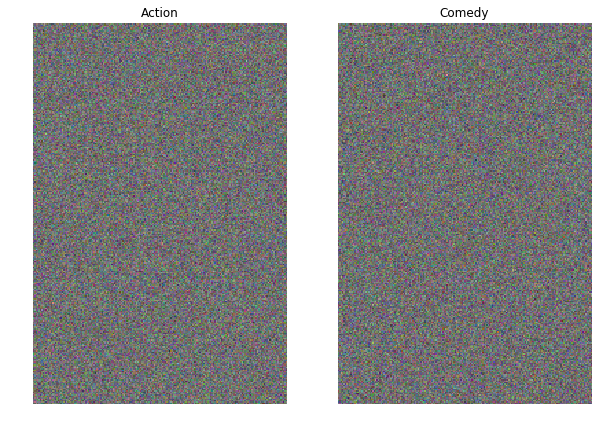

In [19]:
W = model.get_weights()
W = np.reshape(W, (278, 185, 3, len(USED_GENRES_LIST)))

W_min, W_max = np.min(W), np.max(W)
for i in range(len(USED_GENRES_LIST)):
    plt.subplot(1, len(USED_GENRES_LIST), i + 1)
    # Rescale the weights to be between 0 and 255
    W_img = 255.0 * (W[:, :, :, i].squeeze() - W_min) / (W_max - W_min)
    plt.imshow(W_img.astype('uint8'))
    plt.axis('off')
    plt.title(USED_GENRES_LIST[i])